<a href="https://colab.research.google.com/github/riubi/tests-math/blob/main/ab_tests/Homework_modul_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистический анализ двух бинарных выборок

## 📊 Условие задачи

### Исходные данные:
- **Две бинарные выборки** с вероятностями успеха:
  - $p_1 = 0.35$ (первая выборка)
  - $p_2 = 0.40$ (вторая выборка)
- **Уровень значимости**: $\alpha = 0.05$ (p-value)
- **Минимальный детектируемый эффект (MDE)**: $\delta = |p_2 - p_1| = 0.05$

### Поставленные задачи:

#### 1. 📈 Определение минимального размера выборки
**Цель**: Найти минимальное количество элементов $n$ в каждой выборке, необходимое для детекции MDE с заданной мощностью теста ($1 - \beta = 0.8$).

**Формула для расчета**:
$$
n = \frac{(z_{1-\alpha/2} \cdot \sqrt{2 \cdot \bar{p} \cdot (1-\bar{p})} + z_{1-\beta} \cdot \sqrt{p_1(1-p_1) + p_2(1-p_2)})^2}{(p_1 - p_2)^2}
$$

где:
- $\bar{p} = \frac{p_1 + p_2}{2}$ - объединенная пропорция
- $z_{1-\alpha/2}$ - квантиль нормального распределения для двустороннего теста
- $z_{1-\beta}$ - квантиль нормального распределения для мощности теста

#### 2. 🔄 Преобразование распределений через ЦПТ
**Цель**: Используя Центральную Предельную Теорему (ЦПТ), преобразовать биномиальные распределения к нормальным.

**Формулы преобразования**:
- Для выборки размера $n$ с вероятностью $p$:
  $$
  \text{Среднее: } \mu = p
  $$
  $$
  \text{Стандартное отклонение: } \sigma = \sqrt{\frac{p(1-p)}{n}}
  $$
- Получаем нормальные распределения:
  - Первая выборка: $N(\mu_1, \sigma_1)$
  - Вторая выборка: $N(\mu_2, \sigma_2)$

#### 3. 📊 Визуализация распределений и ошибок
**Требуется построить два графика**:

**График 1**: Двусторонняя альтернатива
- Распределения обеих выборок
- Критические области для ошибки I рода ($\alpha$)
- Область ошибки II рода ($\beta$)

**График 2**: Односторонняя альтернатива ($p_1 > p_2$)
- Распределения обеих выборок  
- Односторонние критические области
- Соответствующие области ошибок

**Обозначения на графиках**:
- 🟦 **Синяя область** - Ошибка I рода (вероятность $\alpha$)
- 🟥 **Красная область** - Ошибка II рода (вероятность $\beta$)
- 📍 **Вертикальные линии** - Критические значения и средние

#### 4. 📐 Расчет доверительных интервалов
**Цель**: Построить $95\%$ доверительные интервалы для средних значений обеих выборок.

**Формула доверительного интервала**:
$$
CI = \hat{p} \pm z_{1-\alpha/2} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

где:
- $\hat{p}$ - выборочная пропорция
- $z_{1-\alpha/2}$ - квантиль стандартного нормального распределения

### 🎯 Ожидаемые результаты:

1. **Числовой результат**: Минимальный размер выборки $n$
2. **Параметры распределений**: $\mu_1, \sigma_1, \mu_2, \sigma_2$
3. **Визуализация**: Два графика с областями статистических ошибок
4. **Интервальные оценки**: Доверительные интервалы для $p_1$ и $p_2$

### 📈 Статистические гипотезы:

**Для двустороннего теста**:
$$
H_0: p_1 = p_2 \\
H_1: p_1 \neq p_2
$$

**Для одностороннего теста**:
$$
H_0: p_1 \leq p_2 \\
H_1: p_1 > p_2
$$

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

p1 = 0.35
p2 = 0.40
alpha = 0.05
power = 0.8
beta = 1 - power


## Задание 1. Определение минимального размера выборки


In [224]:
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(power)
p_bar = (p1 + p2) / 2

numerator = (z_alpha * np.sqrt(2 * p_bar * (1 - p_bar)) + 
             z_beta * np.sqrt(p1*(1-p1) + p2*(1-p2)))**2
denominator = (p1 - p2)**2

n = numerator / denominator
n = math.ceil(n)

print(f"МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):")
print(f"n1 = n2 = {n} элементов в каждой группе")


МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):
n1 = n2 = 1471 элементов в каждой группе


## Задание 2. Преобразование распределений через ЦПТ


In [225]:
n_equal = n
n1_unequal = n // 2
n2_unequal = n1_unequal * 10

mu1_eq = p1
mu2_eq = p2
sigma1_eq = np.sqrt(p1 * (1 - p1) / n_equal)
sigma2_eq = np.sqrt(p2 * (1 - p2) / n_equal)

mu1_uneq = p1
mu2_uneq = p2
sigma1_uneq = np.sqrt(p1 * (1 - p1) / n1_unequal)
sigma2_uneq = np.sqrt(p2 * (1 - p2) / n2_unequal)

print("ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:")
print(f"\nРАВНЫЕ ВЫБОРКИ (n={n_equal}):")
print(f"Группа 1: N(μ={mu1_eq:.4f}, σ={sigma1_eq:.4f})")
print(f"Группа 2: N(μ={mu2_eq:.4f}, σ={sigma2_eq:.4f})")

print(f"\nНЕРАВНЫЕ ВЫБОРКИ (n1={n1_unequal}, n2={n2_unequal}):")
print(f"Группа 1: N(μ={mu1_uneq:.4f}, σ={sigma1_uneq:.4f})")
print(f"Группа 2: N(μ={mu2_uneq:.4f}, σ={sigma2_uneq:.4f})")


ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:

РАВНЫЕ ВЫБОРКИ (n=1471):
Группа 1: N(μ=0.3500, σ=0.0124)
Группа 2: N(μ=0.4000, σ=0.0128)

НЕРАВНЫЕ ВЫБОРКИ (n1=735, n2=7350):
Группа 1: N(μ=0.3500, σ=0.0176)
Группа 2: N(μ=0.4000, σ=0.0057)


## Задание 3. Визуализация распределений и ошибок

### Двусторонняя альтернатива


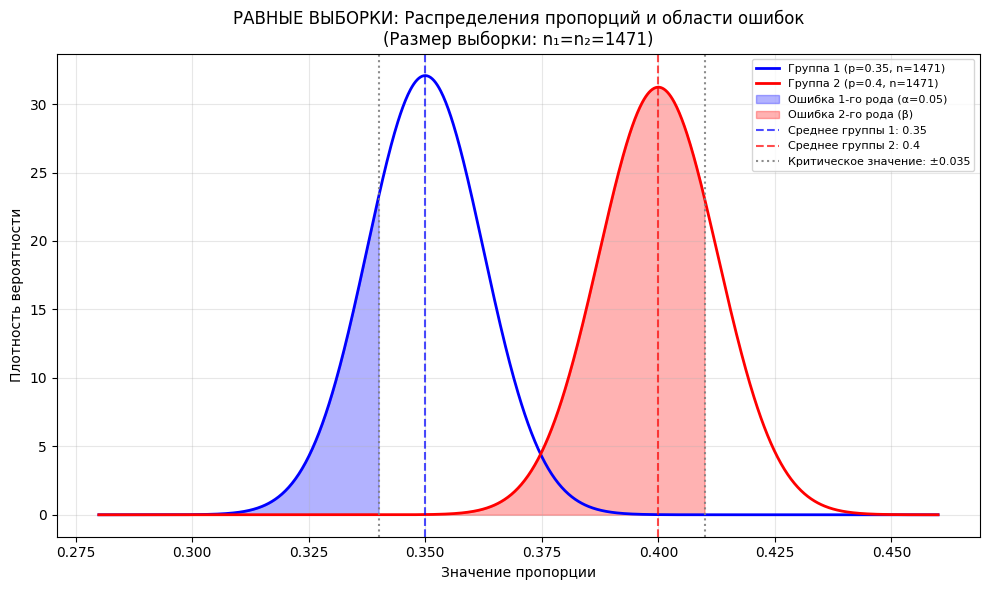

In [226]:
def plot_two_sided(n1, n2, title_suffix):
    sigma1 = np.sqrt(p1 * (1 - p1) / n1)
    sigma2 = np.sqrt(p2 * (1 - p2) / n2)
    sigma_pooled = np.sqrt(p_bar * (1 - p_bar) * (1/n1 + 1/n2))
    
    critical_low = p_bar - z_alpha * sigma_pooled
    critical_high = p_bar + z_alpha * sigma_pooled
    
    x = np.linspace(0.28, 0.46, 1000)
    y1 = stats.norm.pdf(x, p1, sigma1)
    y2 = stats.norm.pdf(x, p2, sigma2)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x, y1, 'b-', linewidth=2, label=f'Группа 1 (p={p1}, n={n1})')
    ax.plot(x, y2, 'r-', linewidth=2, label=f'Группа 2 (p={p2}, n={n2})')
    
    mask_left = x <= critical_low
    ax.fill_between(x[mask_left], y1[mask_left], alpha=0.3, color='blue', label='Ошибка 1-го рода (α=0.05)')
    
    mask_right = x >= critical_high
    ax.fill_between(x[mask_right], y1[mask_right], alpha=0.3, color='blue')
    
    mask_beta = (x >= critical_low) & (x <= critical_high)
    ax.fill_between(x[mask_beta], y2[mask_beta], alpha=0.3, color='red', label='Ошибка 2-го рода (β)')
    
    ax.axvline(p1, color='blue', linestyle='--', alpha=0.7, label=f'Среднее группы 1: {p1}')
    ax.axvline(p2, color='red', linestyle='--', alpha=0.7, label=f'Среднее группы 2: {p2}')
    ax.axvline(critical_low, color='gray', linestyle=':', alpha=0.9, label=f'Критическое значение: ±{abs(critical_high-p_bar):.3f}')
    ax.axvline(critical_high, color='gray', linestyle=':', alpha=0.9)
    
    ax.set_xlabel('Значение пропорции')
    ax.set_ylabel('Плотность вероятности')
    ax.set_title(f'РАВНЫЕ ВЫБОРКИ: Распределения пропорций и области ошибок\n{title_suffix}')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_two_sided(n_equal, n_equal, f"(Размер выборки: n₁=n₂={n_equal})")


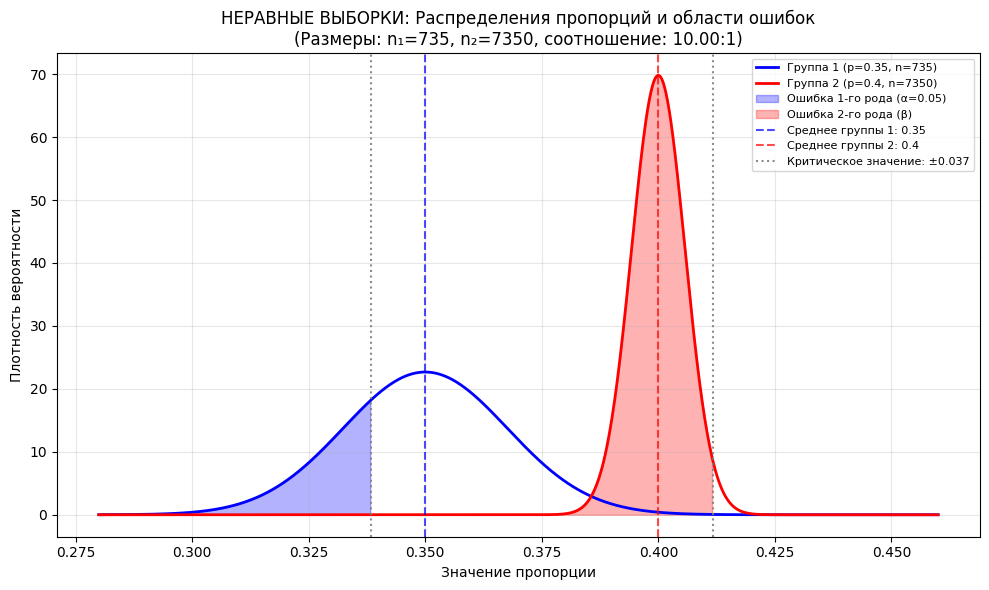

In [227]:
def plot_two_sided_unequal(n1, n2):
    sigma1 = np.sqrt(p1 * (1 - p1) / n1)
    sigma2 = np.sqrt(p2 * (1 - p2) / n2)
    sigma_pooled = np.sqrt(p_bar * (1 - p_bar) * (1/n1 + 1/n2))
    
    critical_low = p_bar - z_alpha * sigma_pooled
    critical_high = p_bar + z_alpha * sigma_pooled
    
    x = np.linspace(0.28, 0.46, 1000)
    y1 = stats.norm.pdf(x, p1, sigma1)
    y2 = stats.norm.pdf(x, p2, sigma2)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x, y1, 'b-', linewidth=2, label=f'Группа 1 (p={p1}, n={n1})')
    ax.plot(x, y2, 'r-', linewidth=2, label=f'Группа 2 (p={p2}, n={n2})')
    
    mask_left = x <= critical_low
    ax.fill_between(x[mask_left], y1[mask_left], alpha=0.3, color='blue', label='Ошибка 1-го рода (α=0.05)')
    
    mask_right = x >= critical_high
    ax.fill_between(x[mask_right], y1[mask_right], alpha=0.3, color='blue')
    
    mask_beta = (x >= critical_low) & (x <= critical_high)
    ax.fill_between(x[mask_beta], y2[mask_beta], alpha=0.3, color='red', label='Ошибка 2-го рода (β)')
    
    ax.axvline(p1, color='blue', linestyle='--', alpha=0.7, label=f'Среднее группы 1: {p1}')
    ax.axvline(p2, color='red', linestyle='--', alpha=0.7, label=f'Среднее группы 2: {p2}')
    ax.axvline(critical_low, color='gray', linestyle=':', alpha=0.9, label=f'Критическое значение: ±{abs(critical_high-p_bar):.3f}')
    ax.axvline(critical_high, color='gray', linestyle=':', alpha=0.9)
    
    ax.set_xlabel('Значение пропорции')
    ax.set_ylabel('Плотность вероятности')
    ratio = n2 / n1
    ax.set_title(f'НЕРАВНЫЕ ВЫБОРКИ: Распределения пропорций и области ошибок\n(Размеры: n₁={n1}, n₂={n2}, соотношение: {ratio:.2f}:1)')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_two_sided_unequal(n1_unequal, n2_unequal)


### Односторонняя альтернатива


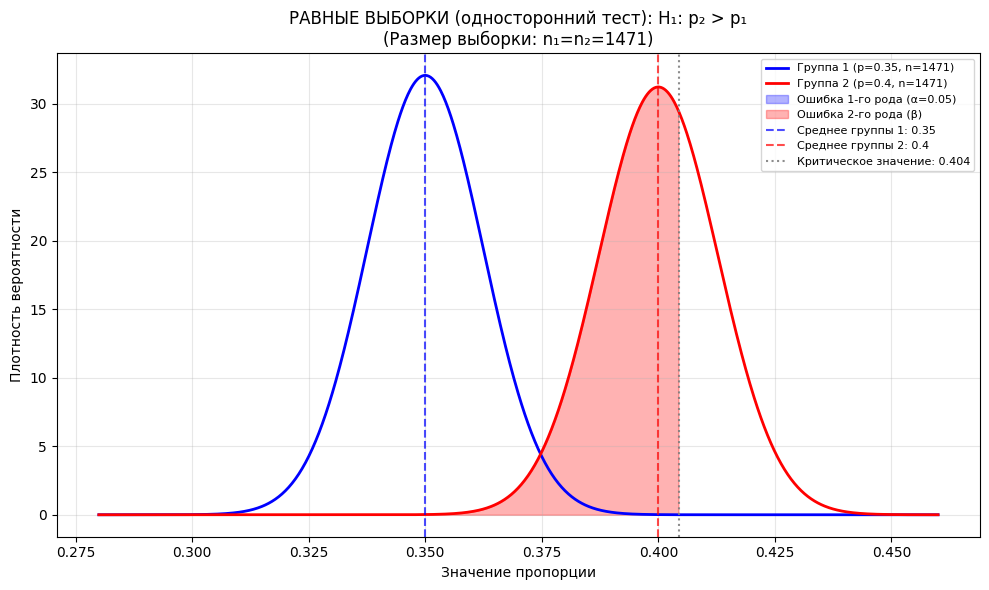

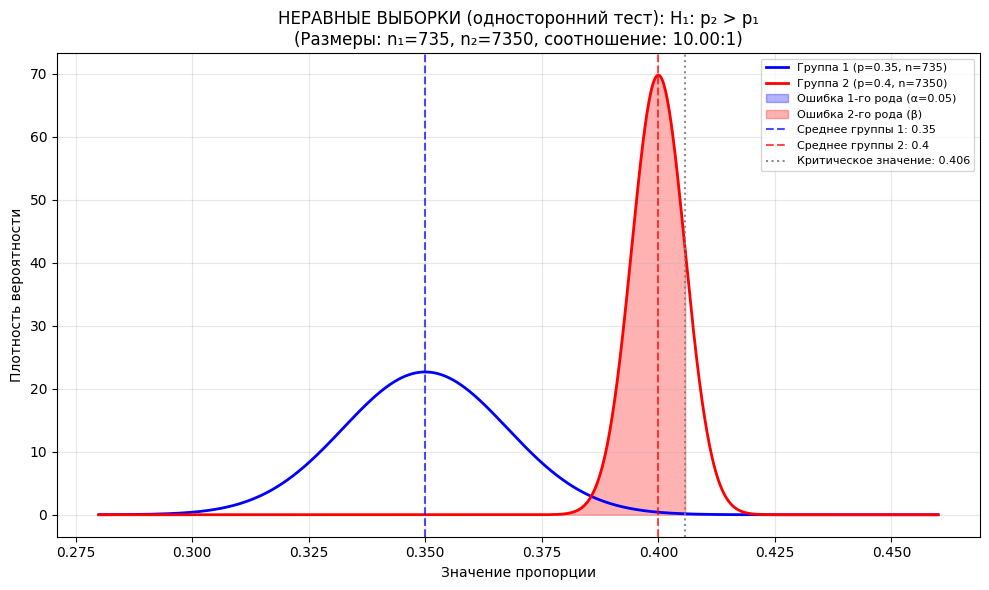

In [228]:
def plot_one_sided(n1, n2, is_equal=True):
    sigma1 = np.sqrt(p1 * (1 - p1) / n1)
    sigma2 = np.sqrt(p2 * (1 - p2) / n2)
    sigma_pooled = np.sqrt(p_bar * (1 - p_bar) * (1/n1 + 1/n2))
    
    z_alpha_one = stats.norm.ppf(1 - alpha)
    critical = p_bar + z_alpha_one * sigma_pooled
    
    x = np.linspace(0.28, 0.46, 1000)
    y1 = stats.norm.pdf(x, p1, sigma1)
    y2 = stats.norm.pdf(x, p2, sigma2)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x, y1, 'b-', linewidth=2, label=f'Группа 1 (p={p1}, n={n1})')
    ax.plot(x, y2, 'r-', linewidth=2, label=f'Группа 2 (p={p2}, n={n2})')
    
    mask_alpha = x >= critical
    ax.fill_between(x[mask_alpha], y1[mask_alpha], alpha=0.3, color='blue', label='Ошибка 1-го рода (α=0.05)')
    
    mask_beta = x <= critical
    ax.fill_between(x[mask_beta], y2[mask_beta], alpha=0.3, color='red', label='Ошибка 2-го рода (β)')
    
    ax.axvline(p1, color='blue', linestyle='--', alpha=0.7, label=f'Среднее группы 1: {p1}')
    ax.axvline(p2, color='red', linestyle='--', alpha=0.7, label=f'Среднее группы 2: {p2}')
    ax.axvline(critical, color='gray', linestyle=':', alpha=0.9, label=f'Критическое значение: {critical:.3f}')
    
    ax.set_xlabel('Значение пропорции')
    ax.set_ylabel('Плотность вероятности')
    
    if is_equal:
        ax.set_title(f'РАВНЫЕ ВЫБОРКИ (односторонний тест): H₁: p₂ > p₁\n(Размер выборки: n₁=n₂={n1})')
    else:
        ratio = n2 / n1
        ax.set_title(f'НЕРАВНЫЕ ВЫБОРКИ (односторонний тест): H₁: p₂ > p₁\n(Размеры: n₁={n1}, n₂={n2}, соотношение: {ratio:.2f}:1)')
    
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_one_sided(n_equal, n_equal, is_equal=True)
plot_one_sided(n1_unequal, n2_unequal, is_equal=False)


## Задание 4. Расчет доверительных интервалов


In [229]:
def calc_ci(p, n, confidence=0.95):
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    se = np.sqrt(p * (1 - p) / n)
    margin = z * se
    return p - margin, p + margin, 2 * margin

ci1_eq_low, ci1_eq_high, width1_eq = calc_ci(p1, n_equal)
ci2_eq_low, ci2_eq_high, width2_eq = calc_ci(p2, n_equal)

ci1_uneq_low, ci1_uneq_high, width1_uneq = calc_ci(p1, n1_unequal)
ci2_uneq_low, ci2_uneq_high, width2_uneq = calc_ci(p2, n2_unequal)

print(f"ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия {1-alpha}):")
print(f"\nРАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1_eq_low:.4f}, {ci1_eq_high:.4f}] (ширина: {width1_eq:.4f})")
print(f"Группа 2: [{ci2_eq_low:.4f}, {ci2_eq_high:.4f}] (ширина: {width2_eq:.4f})")

print(f"\nНЕРАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1_uneq_low:.4f}, {ci1_uneq_high:.4f}] (ширина: {width1_uneq:.4f})")
print(f"Группа 2: [{ci2_uneq_low:.4f}, {ci2_uneq_high:.4f}] (ширина: {width2_uneq:.4f})")


ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):

РАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3256, 0.3744] (ширина: 0.0487)
Группа 2: [0.3750, 0.4250] (ширина: 0.0501)

НЕРАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3155, 0.3845] (ширина: 0.0690)
Группа 2: [0.3888, 0.4112] (ширина: 0.0224)


## Итоговые результаты


In [230]:
print("=" * 60)
print("АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)")
print("=" * 60)

print(f"\nВероятность в группе 1: {p1}")
print(f"Вероятность в группе 2: {p2}")
print(f"Уровень значимости (p-value): {alpha}")
print(f"Мощность теста: {power}")

print(f"\nМИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):")
print(f"n₁ = n₂ = {n_equal} элементов в каждой группе")

print(f"\nПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:")
print(f"\nРАВНЫЕ ВЫБОРКИ (n={n_equal}):")
print(f"Группа 1: N(μ={mu1_eq:.4f}, σ={sigma1_eq:.4f})")
print(f"Группа 2: N(μ={mu2_eq:.4f}, σ={sigma2_eq:.4f})")

print(f"\nНЕРАВНЫЕ ВЫБОРКИ (n₁={n1_unequal}, n₂={n2_unequal}):")
print(f"Группа 1: N(μ={mu1_uneq:.4f}, σ={sigma1_uneq:.4f})")
print(f"Группа 2: N(μ={mu2_uneq:.4f}, σ={sigma2_uneq:.4f})")

print(f"\nДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия {1-alpha}):")
print(f"\nРАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1_eq_low:.4f}, {ci1_eq_high:.4f}] (ширина: {width1_eq:.4f})")
print(f"Группа 2: [{ci2_eq_low:.4f}, {ci2_eq_high:.4f}] (ширина: {width2_eq:.4f})")

print(f"\nНЕРАВНЫЕ ВЫБОРКИ:")
print(f"Группа 1: [{ci1_uneq_low:.4f}, {ci1_uneq_high:.4f}] (ширина: {width1_uneq:.4f})")
print(f"Группа 2: [{ci2_uneq_low:.4f}, {ci2_uneq_high:.4f}] (ширина: {width2_uneq:.4f})")


АНАЛИЗ ДВУХ БИНАРНЫХ ВЫБОРОК (С НЕРАВНЫМИ РАЗМЕРАМИ)

Вероятность в группе 1: 0.35
Вероятность в группе 2: 0.4
Уровень значимости (p-value): 0.05
Мощность теста: 0.8

МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ (РАВНЫЕ ГРУППЫ):
n₁ = n₂ = 1471 элементов в каждой группе

ПРЕОБРАЗОВАНИЕ ЧЕРЕЗ ЦПТ:

РАВНЫЕ ВЫБОРКИ (n=1471):
Группа 1: N(μ=0.3500, σ=0.0124)
Группа 2: N(μ=0.4000, σ=0.0128)

НЕРАВНЫЕ ВЫБОРКИ (n₁=735, n₂=7350):
Группа 1: N(μ=0.3500, σ=0.0176)
Группа 2: N(μ=0.4000, σ=0.0057)

ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (уровень доверия 0.95):

РАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3256, 0.3744] (ширина: 0.0487)
Группа 2: [0.3750, 0.4250] (ширина: 0.0501)

НЕРАВНЫЕ ВЫБОРКИ:
Группа 1: [0.3155, 0.3845] (ширина: 0.0690)
Группа 2: [0.3888, 0.4112] (ширина: 0.0224)
